# Project: Stock Market Analysis and Prediction

## Stock Market Data From Google Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [5]:
import yfinance as yf
from datetime import datetime

# List of Tech_stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For-loop for grabbing Yahoo Finance data and setting as a DataFrame
# Set DataFrame as the Stock Ticker
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL(Apple) Stock DataFrame to get a feel for the data.

In [6]:
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-26  163.059998  165.279999  162.800003  163.759995  162.890533   
2023-04-27  165.190002  168.559998  165.190002  168.410004  167.515854   
2023-04-28  168.490005  169.850006  167.880005  169.679993  168.779114   
2023-05-01  169.279999  170.449997  168.639999  169.589996  168.689590   
2023-05-02  170.089996  170.350006  167.539993  168.539993  167.645142   

              Volume  
Date                  
2023-04-26  45498800  
2023-04-27  64902300  
2023-04-28  55209200  
2023-05-01  52472900  
2023-05-02  48425700

In [7]:
# Summery stats for Apple Stock
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   181.079484  182.549048  179.725679  181.209841  180.813055   
std      8.820489    8.662654    8.773854    8.732345    8.706503   
min    163.059998  165.279999  162.800003  163.759995  162.890533   
25%    173.157501  174.680004  172.027504  173.637505  173.225121   
50%    180.379997  182.079994  178.440002  180.640007  180.048973   
75%    189.277496  189.990005  187.652500  189.317501  188.879906   
max    198.020004  199.619995  197.000000  198.110001  197.857529   

             Volume  
count  2.520000e+02  
mean   5.784364e+07  
std    1.762711e+07  
min    2.404830e+07  
25%    4.678918e+07  
50%    5.368500e+07  
75%    6.428920e+07  
max    1.366826e+08

In [8]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-26 to 2024-04-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

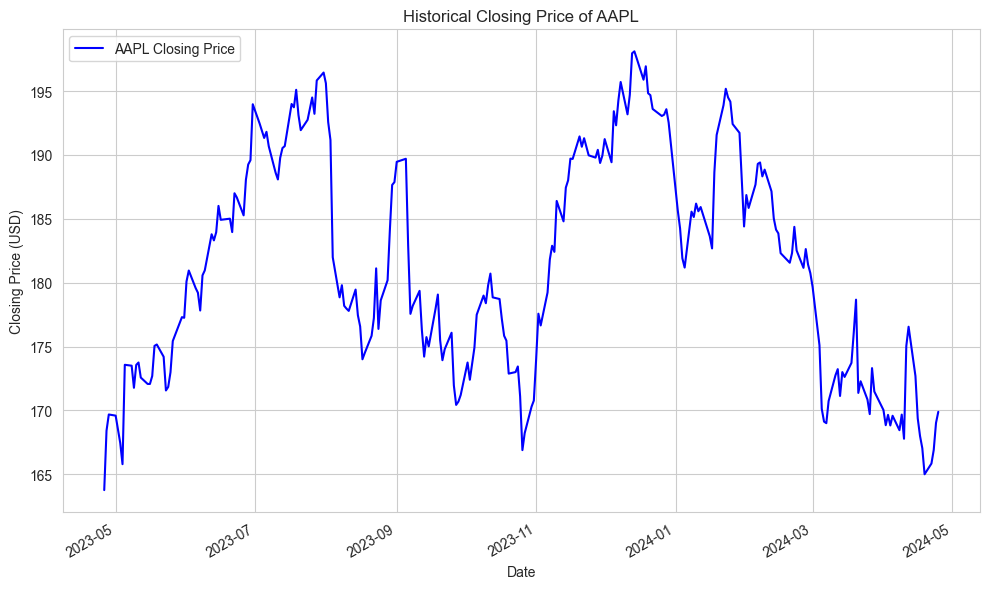

In [10]:
import matplotlib.pyplot as plt

# Plotting the historical closing price of AAPL
plt.figure(figsize=(10, 6))
AAPL['Close'].plot(color='blue', linestyle='-', linewidth=1.5, label='AAPL Closing Price')
plt.title('Historical Closing Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


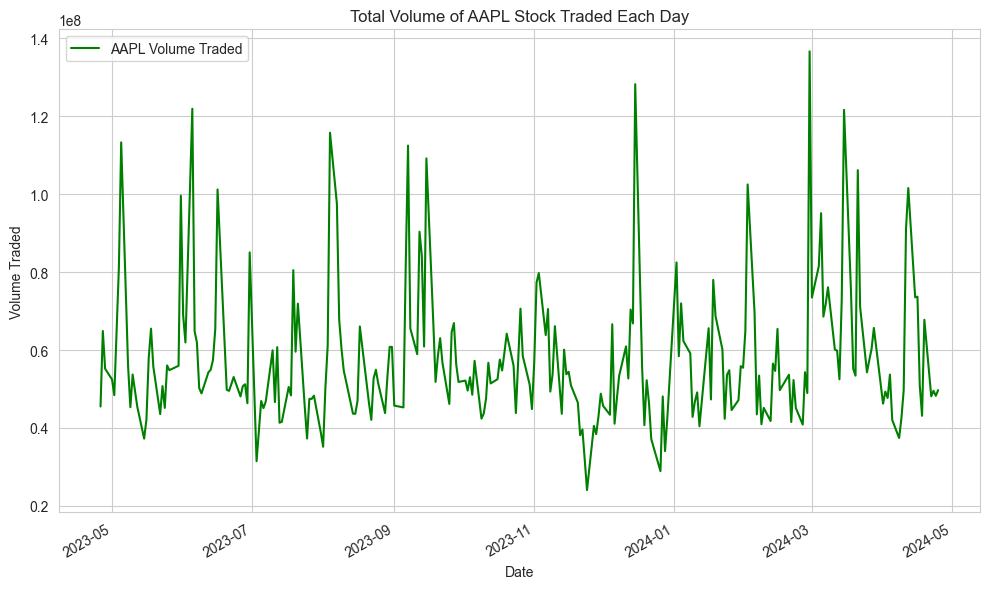

In [11]:
import matplotlib.pyplot as plt

# Plotting the total volume of AAPL stock being traded each day
plt.figure(figsize=(10, 6))
AAPL['Volume'].plot(color='green', linestyle='-', linewidth=1.5, label='AAPL Volume Traded')
plt.title('Total Volume of AAPL Stock Traded Each Day')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


We can see that on Feb'2017 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [13]:
# Pandas has a built-in rolling mean calculator
# Let's go ahead and plot out several moving averages
MA_day = [10, 20, 50, 100]

import pandas as pd

for ma in MA_day:
    column_name = 'MA for %s days' % ma
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()


Now, lets plot all the additional Moving Averages for AAPL stock

<Figure size 1200x800 with 0 Axes>

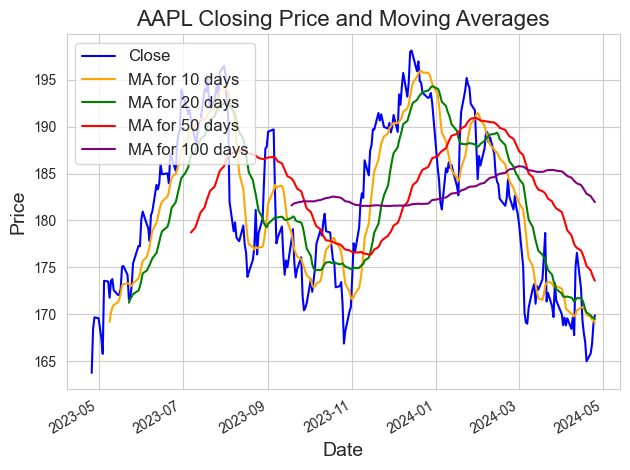

In [17]:
import matplotlib.pyplot as plt

# Plotting the closing price and moving averages
plt.figure(figsize=(12, 8))  # Larger figure size for better clarity
AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(
    color=['blue', 'orange', 'green', 'red', 'purple'], linewidth=1.5)
plt.title('AAPL Closing Price and Moving Averages', fontsize=16)  # Increase title font size
plt.xlabel('Date', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Price', fontsize=14)  # Increase y-axis label font size
plt.grid(True)
plt.legend(loc='upper left', fontsize=12)  # Increase legend font size
plt.tight_layout()
plt.show()


#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. 


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.


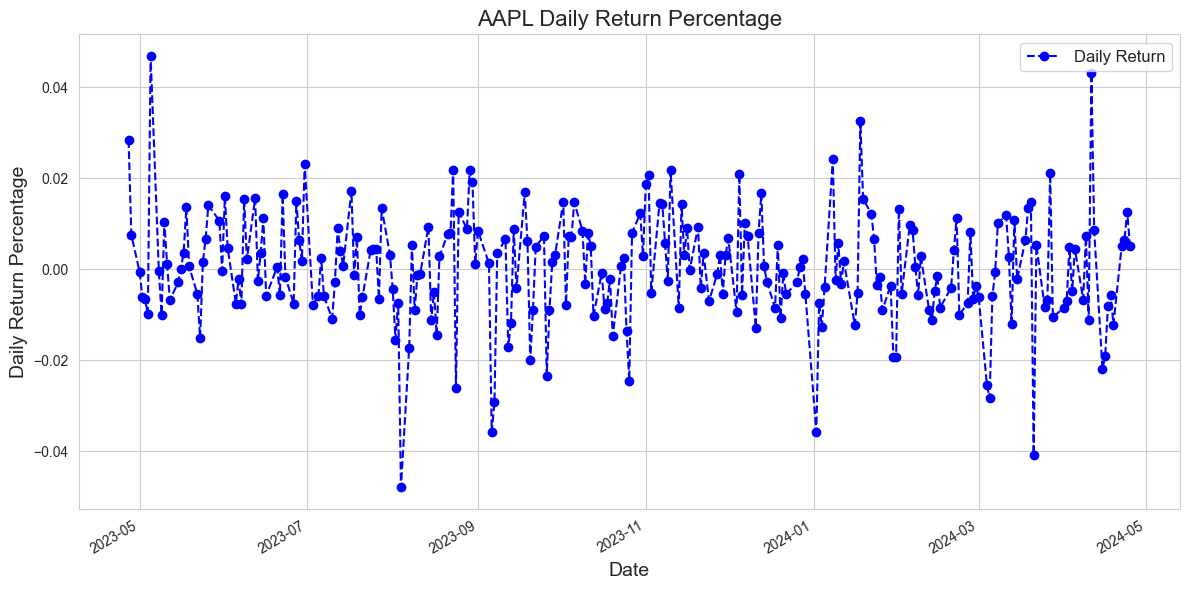

In [19]:
import matplotlib.pyplot as plt

# Plotting the daily return percentage
plt.figure(figsize=(12, 6))  # Adjusting figure size for better clarity
AAPL['Daily Return'].plot(color='blue', linestyle='--', marker='o', linewidth=1.5, label='Daily Return')
plt.title('AAPL Daily Return Percentage', fontsize=16)  # Increase title font size
plt.xlabel('Date', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Daily Return Percentage', fontsize=14)  # Increase y-axis label font size
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)  # Increase legend font size and position
plt.tight_layout()
plt.show()


Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

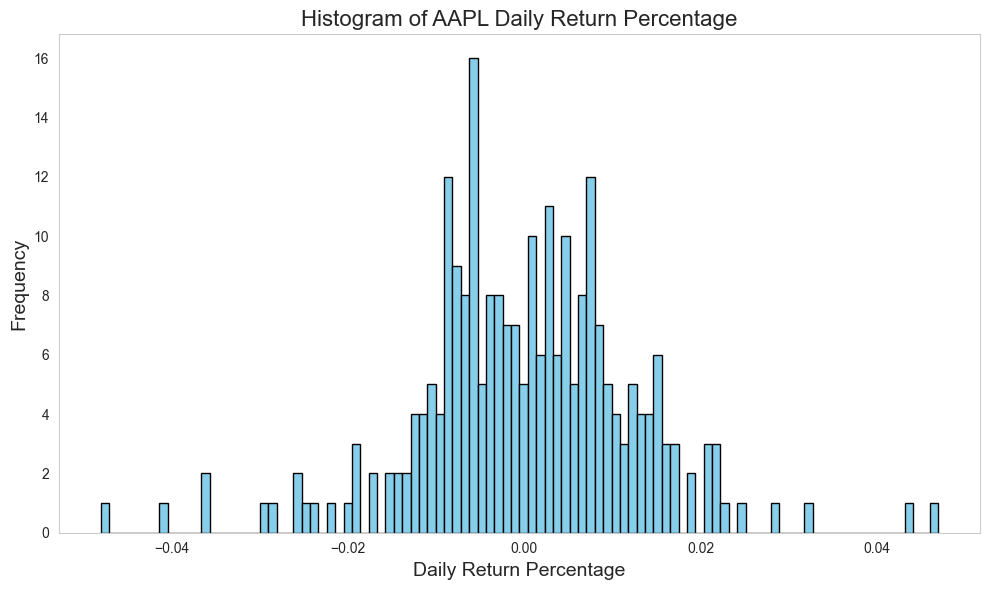

In [21]:
import matplotlib.pyplot as plt

# Plotting the histogram of daily return percentage
plt.figure(figsize=(10, 6))  # Adjusting figure size for better clarity
AAPL['Daily Return'].hist(bins=100, color='skyblue', edgecolor='black')  # Adjusting color and edgecolor
plt.title('Histogram of AAPL Daily Return Percentage', fontsize=16)  # Increase title font size
plt.xlabel('Daily Return Percentage', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Frequency', fontsize=14)  # Increase y-axis label font size
plt.grid(False)  # Turning off grid lines for better clarity
plt.tight_layout()
plt.show()


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_7880\2984188647.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta', hist_kws={'edgecolor': 'black'})  # Adjusting color and edgecolor
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use

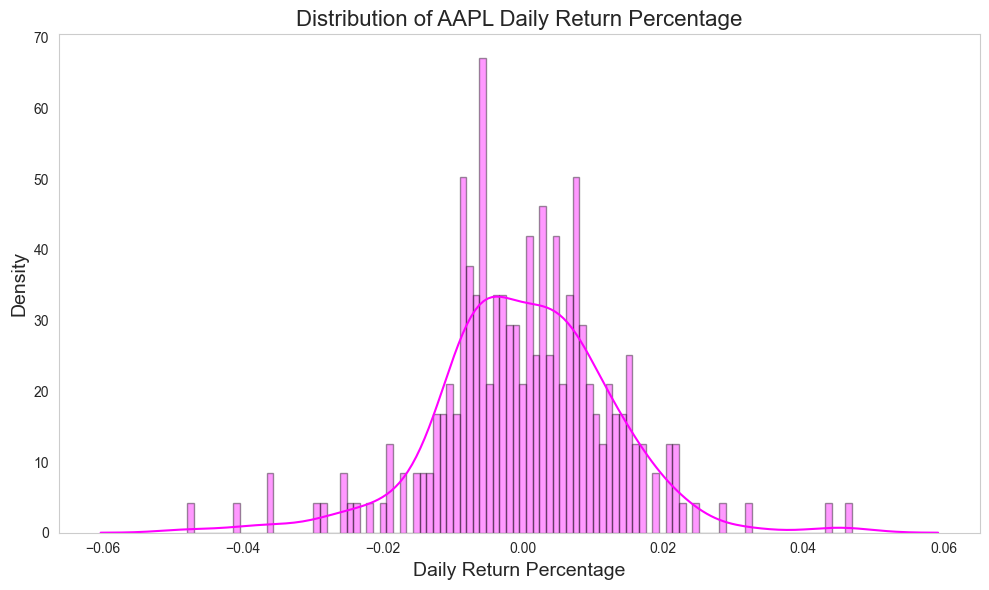

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution plot of daily return percentage
plt.figure(figsize=(10, 6))  # Adjusting figure size for better clarity
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta', hist_kws={'edgecolor': 'black'})  # Adjusting color and edgecolor
plt.title('Distribution of AAPL Daily Return Percentage', fontsize=16)  # Increase title font size
plt.xlabel('Daily Return Percentage', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Density', fontsize=14)  # Increase y-axis label font size
plt.grid(False)  # Turning off grid lines for better clarity
plt.tight_layout()
plt.show()


Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [27]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# List of Tech_stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Grabbing closing prices for the tech stock list into one DataFrame using yfinance
closingprice_df = yf.download(tech_list, start=start, end=end)['Close']


[*********************100%%**********************]  4 of 4 completed


In [28]:
closingprice_df.head(10)

Ticker            AAPL        AMZN       GOOGL        MSFT
Date                                                      
2023-04-26  163.759995  104.980003  103.709999  295.369995
2023-04-27  168.410004  109.820000  107.589996  304.829987
2023-04-28  169.679993  105.449997  107.339996  307.260010
2023-05-01  169.589996  102.050003  107.199997  305.559998
2023-05-02  168.539993  103.629997  105.320000  305.410004
2023-05-03  167.449997  103.650002  105.410004  304.399994
2023-05-04  165.789993  104.000000  104.690002  305.410004
2023-05-05  173.570007  105.660004  105.570000  310.649994
2023-05-08  173.500000  105.830002  107.769997  308.649994
2023-05-09  171.770004  106.620003  107.349998  307.000000

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [29]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [30]:
tech_returns.head()

Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2023-04-26       NaN       NaN       NaN       NaN
2023-04-27  0.028395  0.046104  0.037412  0.032028
2023-04-28  0.007541 -0.039792 -0.002324  0.007972
2023-05-01 -0.000530 -0.032243 -0.001304 -0.005533
2023-05-02 -0.006191  0.015483 -0.017537 -0.000491

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

##### GOOGL is a Alphabet Inc Class A Stock.

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

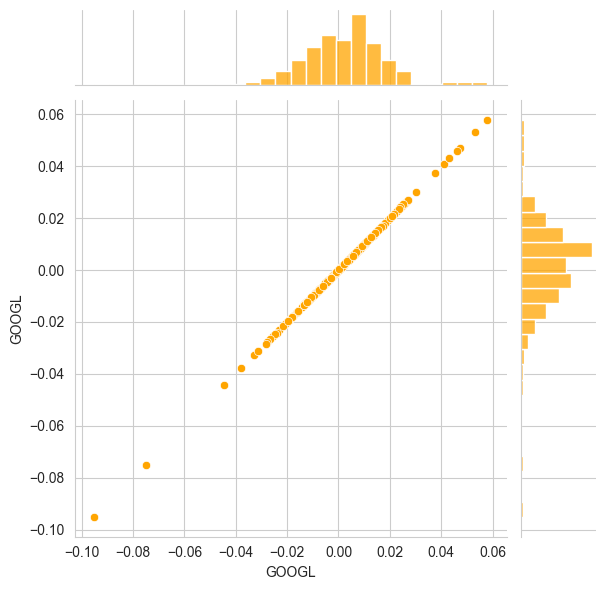

In [32]:
import seaborn as sns

# Comparing 'GOOGL' to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

So let's go ahead and compare Google and Amazon the same way.

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

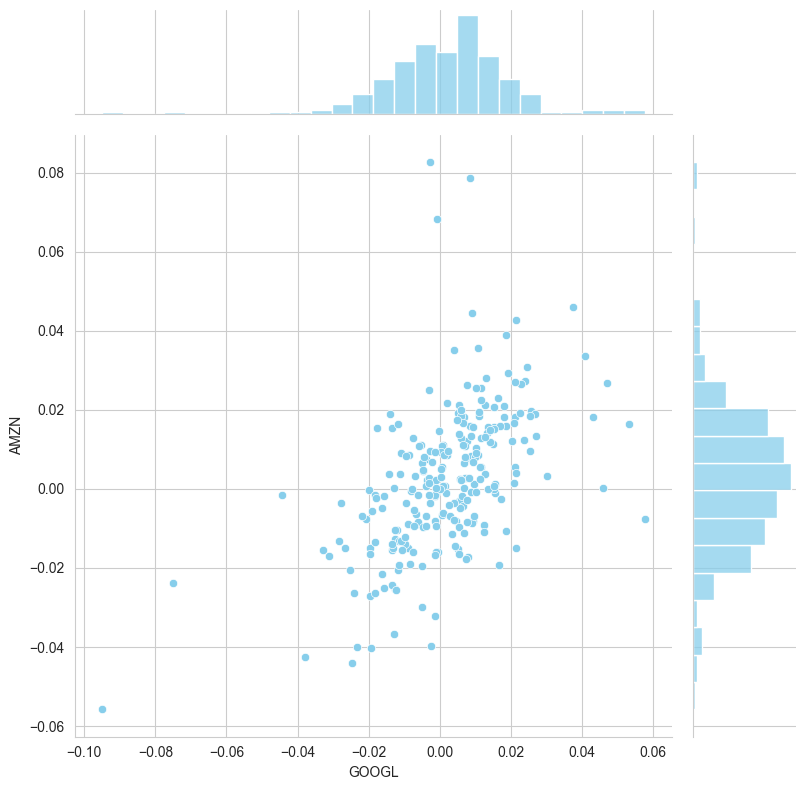

In [36]:
import seaborn as sns

# Comparing the daily returns of Google and Amazon using jointplot
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', height=8, color='skyblue')


In [34]:
# with Hex plot
sns.jointplot('GOOGL','AMZN',tech_returns, kind='hex',size=8, color='skyblue')

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 2 keyword-only arguments) were given

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na op

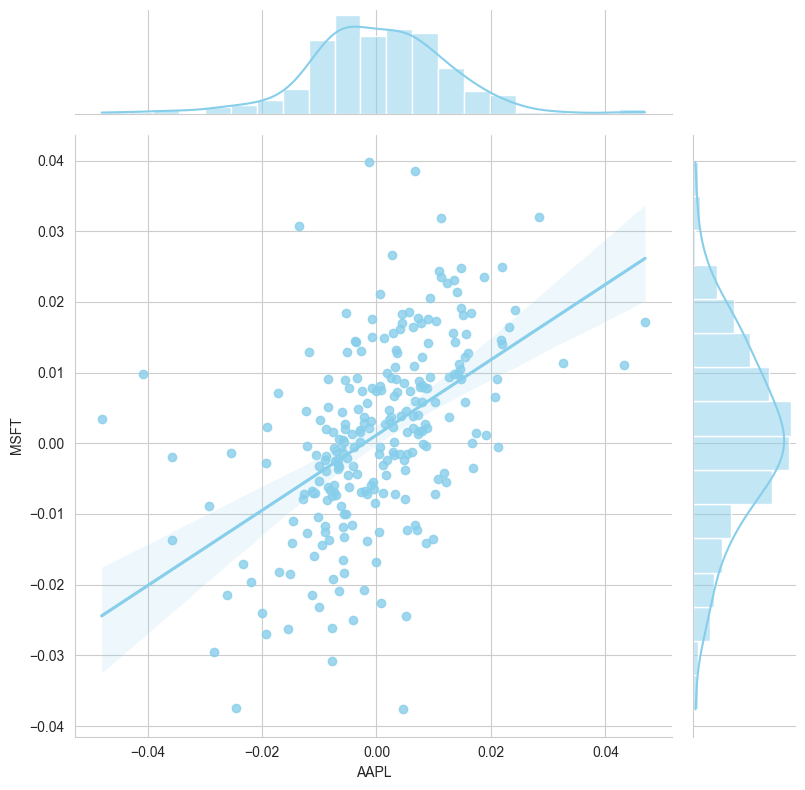

In [37]:
import seaborn as sns

# Checking the relationship between the daily returns of Apple and Microsoft with a regression jointplot
sns.jointplot(x='AAPL', y='MSFT', data=tech_returns, kind='reg', height=8, color='skyblue')


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

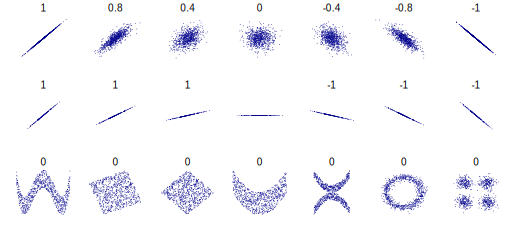

In [38]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

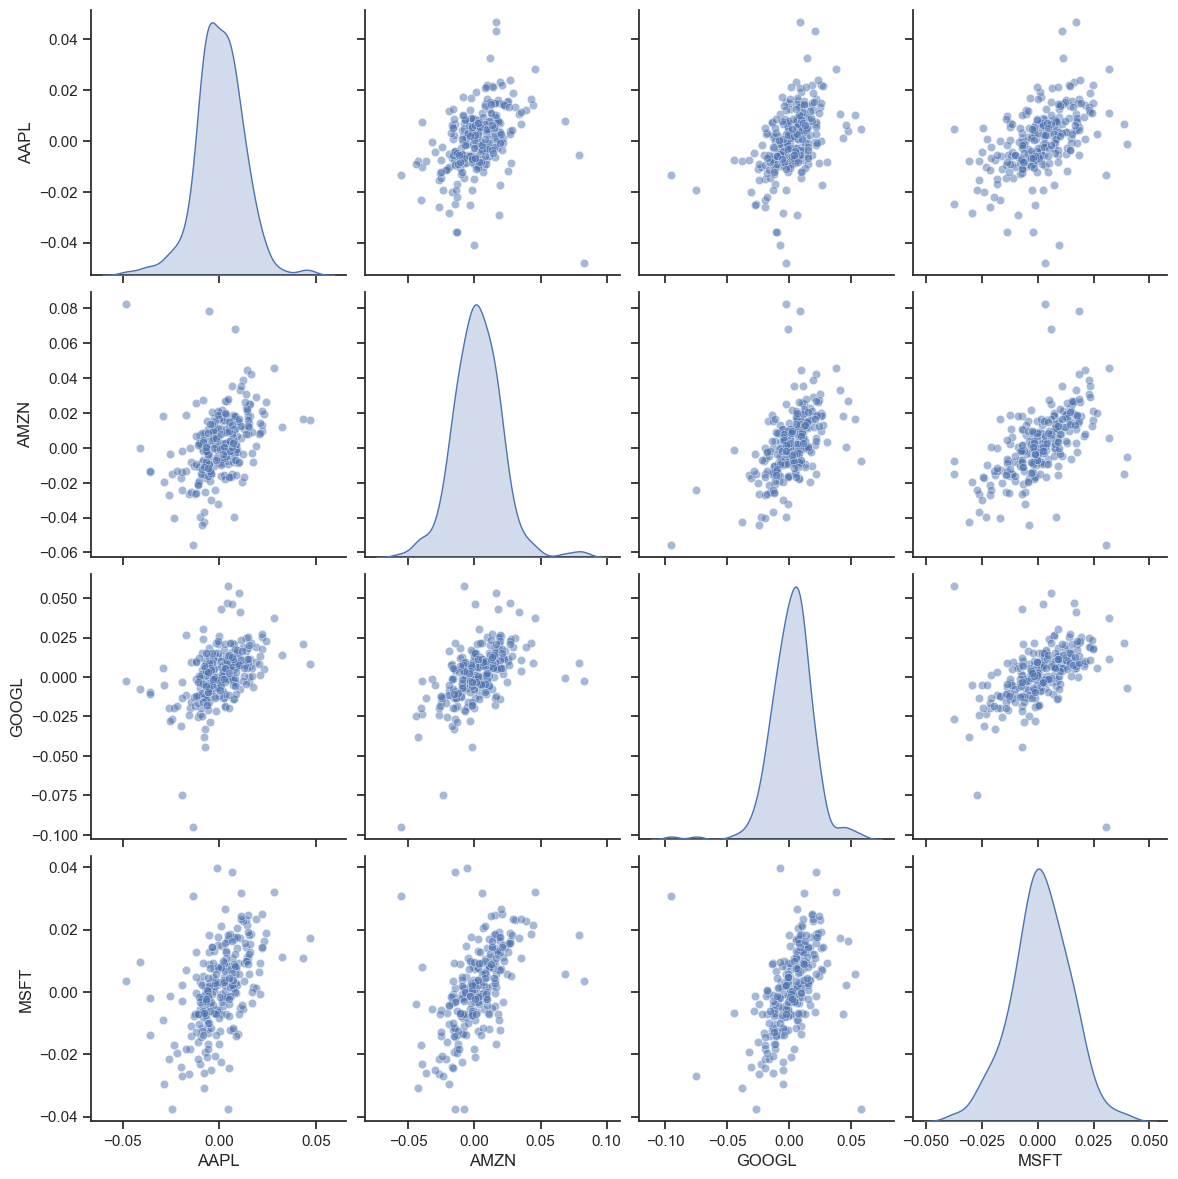

In [41]:
import seaborn as sns


# Set style
sns.set(style="ticks")

# Customize pairplot
sns.pairplot(tech_returns.dropna(), height=3, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

# Show the plot
plt.show()



Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

Below is an example of utilizing the full power of seaborn to achieve this result.

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

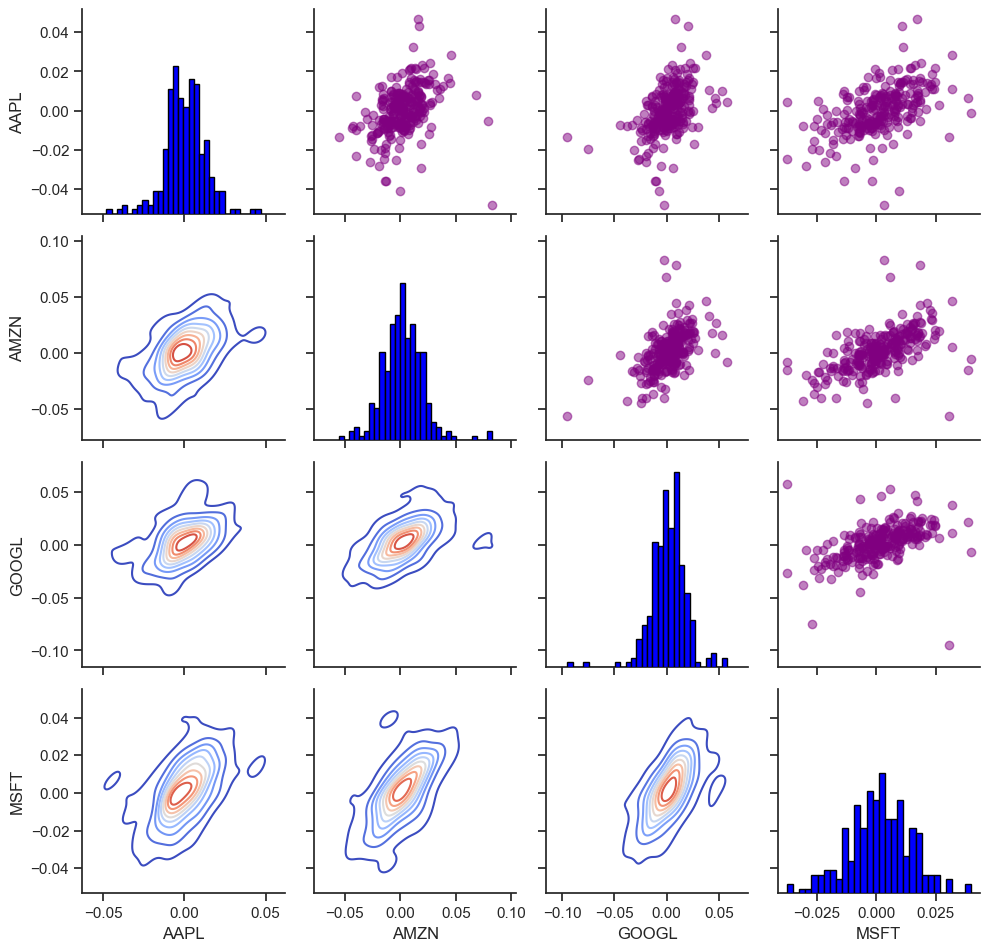

In [43]:
# Set up the figure by naming it returns_fig and calling PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper, specify what the upper triangle will look like (scatter plot with purple color)
returns_fig.map_upper(plt.scatter, color='purple', alpha=0.5)  # Adjust alpha for transparency

# Define the lower triangle in the figure, including the plot type (kde) and the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='coolwarm')  # You can change cmap to any colormap you prefer

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30, color='blue', edgecolor='black')  # Adjust edgecolor for histogram bars

# Adjust layout for better visualization
plt.subplots_adjust(top=0.95)  # Adjust top margin

# Show the plot
plt.show()


We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

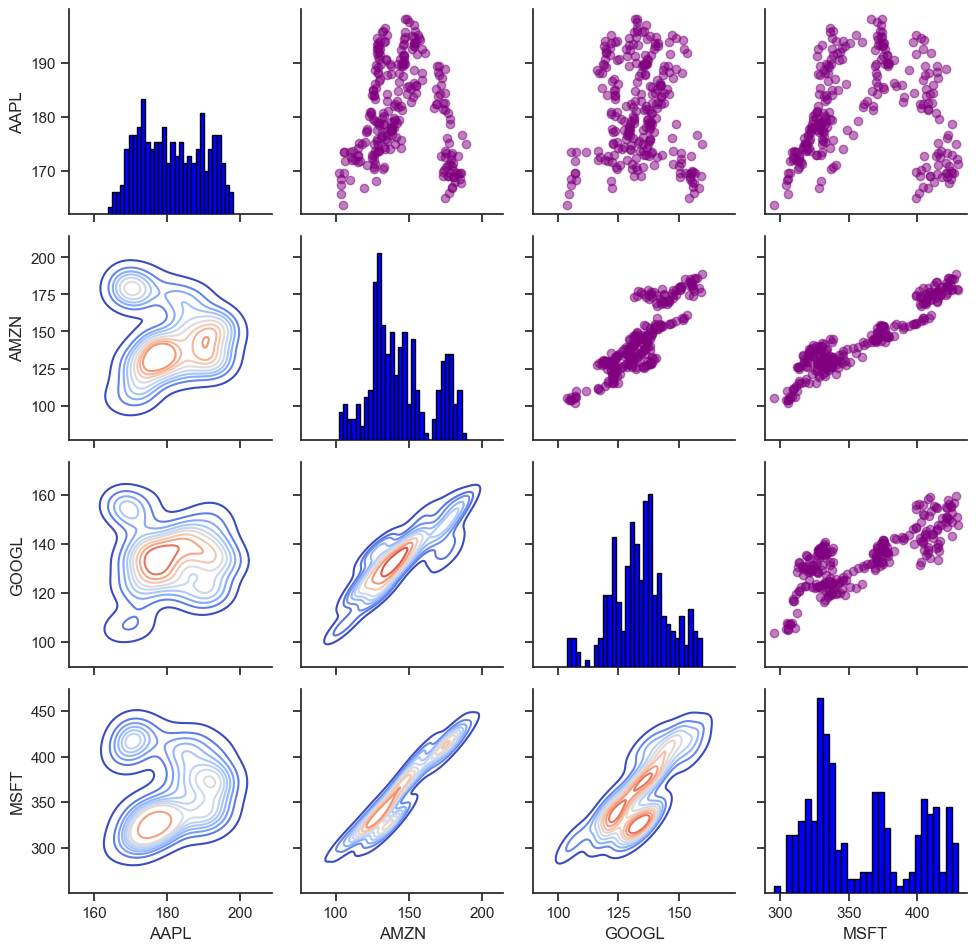

In [45]:
# Set up the figure by naming it returns_fig and calling PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper, specify what the upper triangle will look like (scatter plot with purple color)
returns_fig.map_upper(plt.scatter, color='purple', alpha=0.5)  # Adjust alpha for transparency

# Define the lower triangle in the figure, including the plot type (kde) and the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='coolwarm')  # You can change cmap to any colormap you prefer

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30, color='blue', edgecolor='black')  # Adjust edgecolor for histogram bars

# Adjust layout for better visualization
returns_fig.fig.subplots_adjust(top=0.95)  # Adjust top margin

# Show the plot
plt.show()


Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

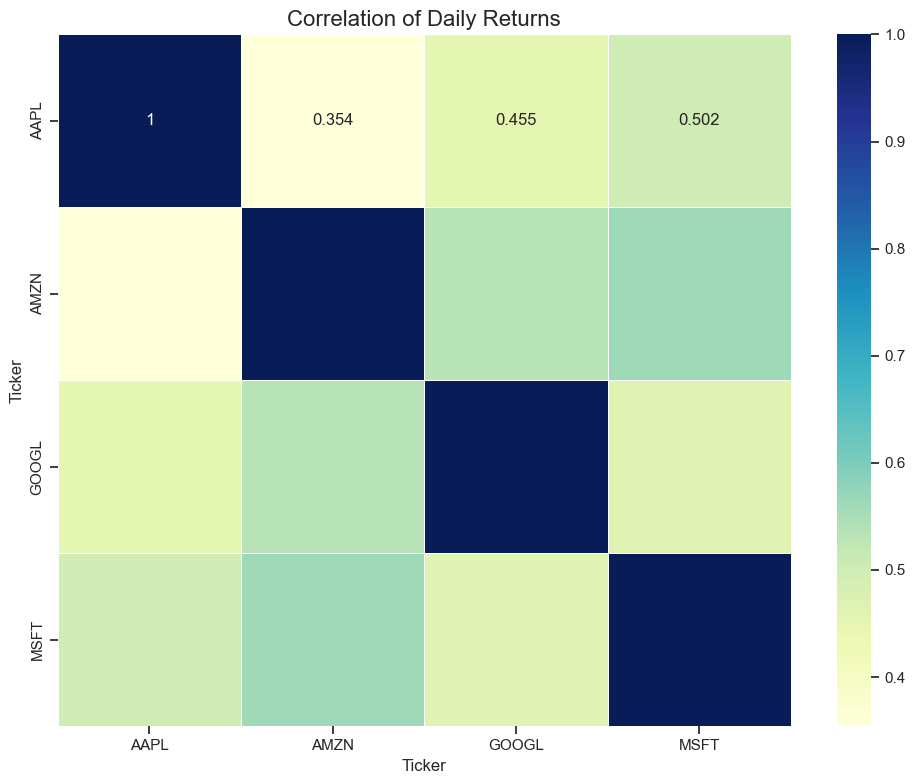

In [47]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap for the correlation of daily returns of the stocks
plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.heatmap(tech_returns.corr(), annot=True, fmt=".3g", cmap='YlGnBu', linewidths=.5)  

# Set title and adjust layout
plt.title('Correlation of Daily Returns', fontsize=16)  
plt.tight_layout()

# Show the plot
plt.show()


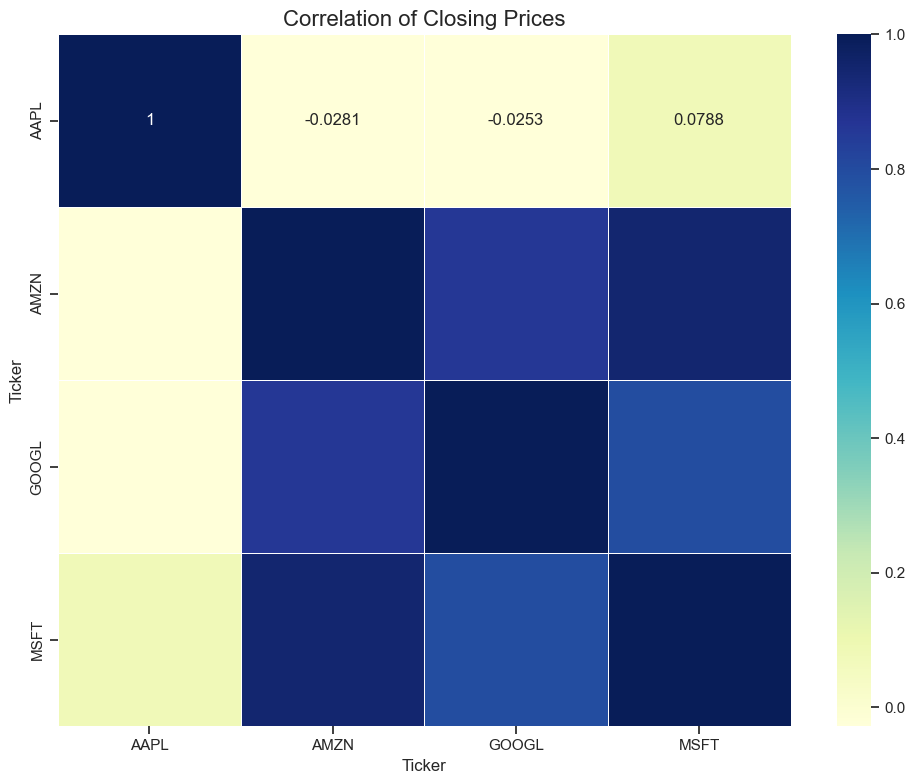

In [48]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap for the correlation of closing prices of the stocks
plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.heatmap(closingprice_df.corr(), annot=True, fmt=".3g", cmap='YlGnBu', linewidths=.5)  

# Set title and adjust layout
plt.title('Correlation of Closing Prices', fontsize=16)  
plt.tight_layout()

# Show the plot
plt.show()


##### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [49]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [50]:
rets.head()

Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2023-04-27  0.028395  0.046104  0.037412  0.032028
2023-04-28  0.007541 -0.039792 -0.002324  0.007972
2023-05-01 -0.000530 -0.032243 -0.001304 -0.005533
2023-05-02 -0.006191  0.015483 -0.017537 -0.000491
2023-05-03 -0.006467  0.000193  0.000855 -0.003307

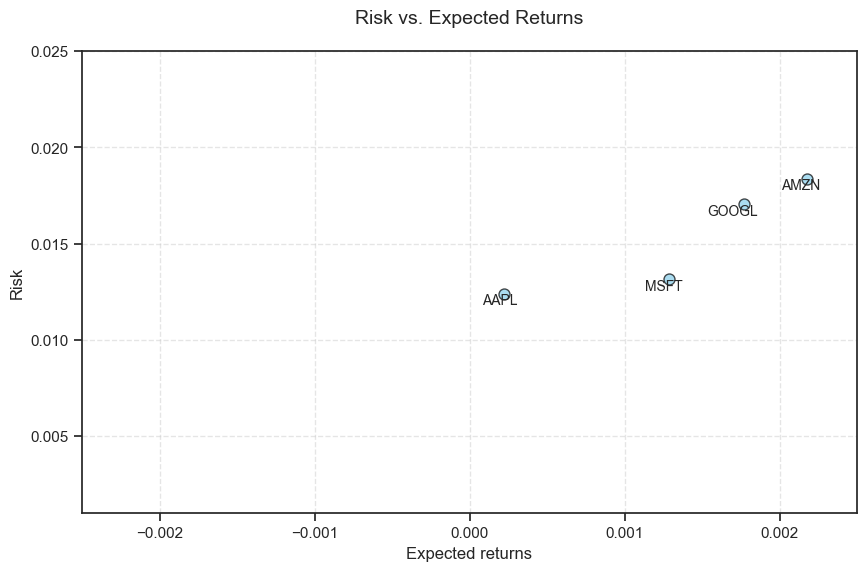

In [56]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi * 20

plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization

# Plot the scatter plot
plt.scatter(rets.mean(), rets.std(), s=area, color='skyblue', edgecolors='black', alpha=0.7)

# Set the x and y limits of the plot
plt.xlim([-0.0025, 0.0025])
plt.ylim([0.001, 0.025])

# Set the plot axis titles
plt.xlabel('Expected returns', fontsize=12)
plt.ylabel('Risk', fontsize=12)

# Label the scatter plots with stock names
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(10, -10),
        textcoords='offset points', ha='right', va='bottom',
        fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and adjust layout
plt.title('Risk vs. Expected Returns', fontsize=14, pad=20)

# Show the plot
plt.show()


By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_7880\1888344805.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', hist_kws=dict(edgecolor="k", linewidth=1))
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is dep

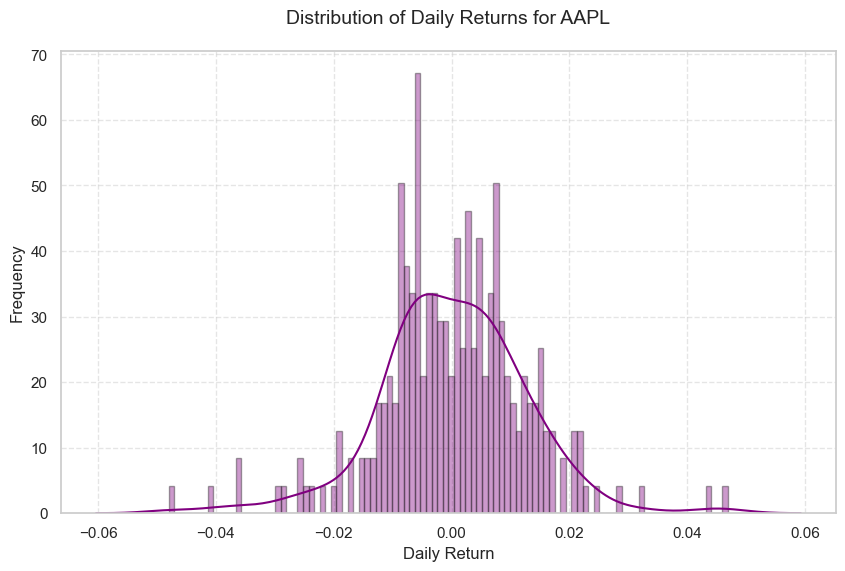

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Create the distribution plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', hist_kws=dict(edgecolor="k", linewidth=1))

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for AAPL', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Now we can use quantile to get the risk value for the stock.

In [59]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.01930170426356803

The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [60]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.02550798379378677

In [61]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.02245613811966457

In [62]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.021513576707190396

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [63]:
rets.head()

Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2023-04-27  0.028395  0.046104  0.037412  0.032028
2023-04-28  0.007541 -0.039792 -0.002324  0.007972
2023-05-01 -0.000530 -0.032243 -0.001304 -0.005533
2023-05-02 -0.006191  0.015483 -0.017537 -0.000491
2023-05-03 -0.006467  0.000193  0.000855 -0.003307

In [64]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [65]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [66]:
# For Google Stock - GOOGL
GOOGL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-26  104.919998  106.349998  102.629997  103.709999  103.709999   
2023-04-27  104.449997  108.370003  103.540001  107.589996  107.589996   
2023-04-28  107.040001  107.349998  105.089996  107.339996  107.339996   
2023-05-01  106.839996  107.989998  106.820000  107.199997  107.199997   
2023-05-02  107.139999  107.199997  103.709999  105.320000  105.320000   

              Volume  
Date                  
2023-04-26  53347600  
2023-04-27  50089200  
2023-04-28  36139800  
2023-05-01  26681700  
2023-05-02  30997200

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


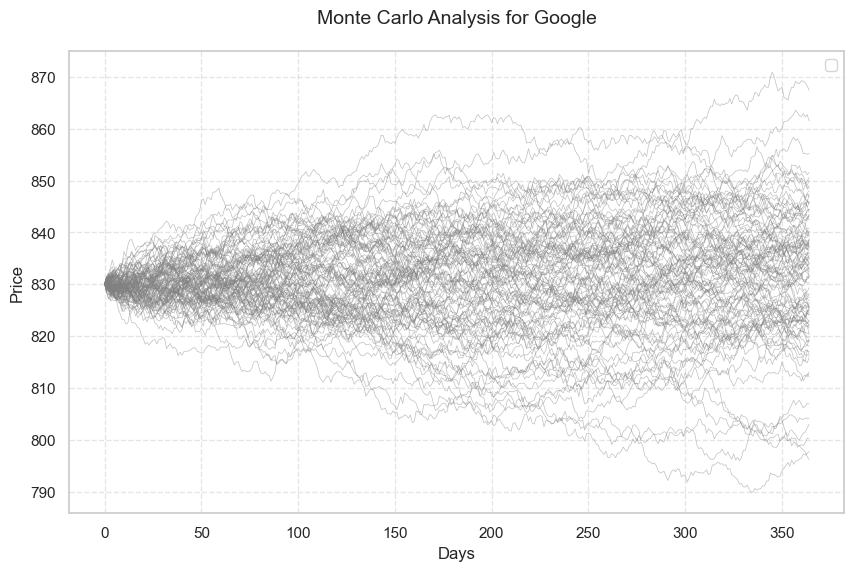

In [74]:
import matplotlib.pyplot as plt

# Define the starting price
start_price = 830.09

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), linewidth=0.5, alpha=0.5, color='gray')



# Set plot labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Google', fontsize=14, pad=20)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


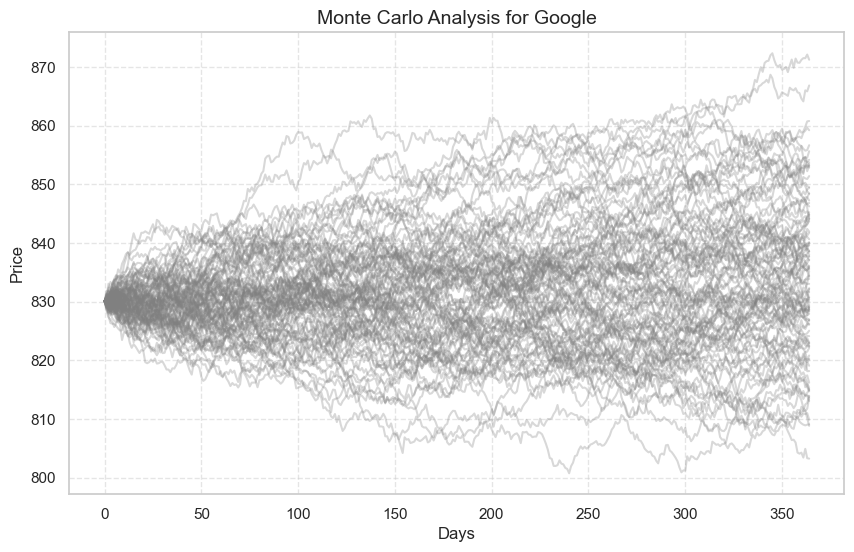

In [75]:
import matplotlib.pyplot as plt

# Define the starting price
start_price = 830.09

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Google', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [76]:
# For Amazon Stock - AMZN
AMZN.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-26  105.040001  106.620003  104.099998  104.980003  104.980003   
2023-04-27  108.160004  110.860001  106.800003  109.820000  109.820000   
2023-04-28  107.730003  109.480003  104.330002  105.449997  105.449997   
2023-05-01  104.949997  105.230003  101.820000  102.050003  102.050003   
2023-05-02  101.470001  103.900002  101.150002  103.629997  103.629997   

               Volume  
Date                   
2023-04-26   73803800  
2023-04-27  149961200  
2023-04-28  130565000  
2023-05-01   74728100  
2023-05-02   73469400

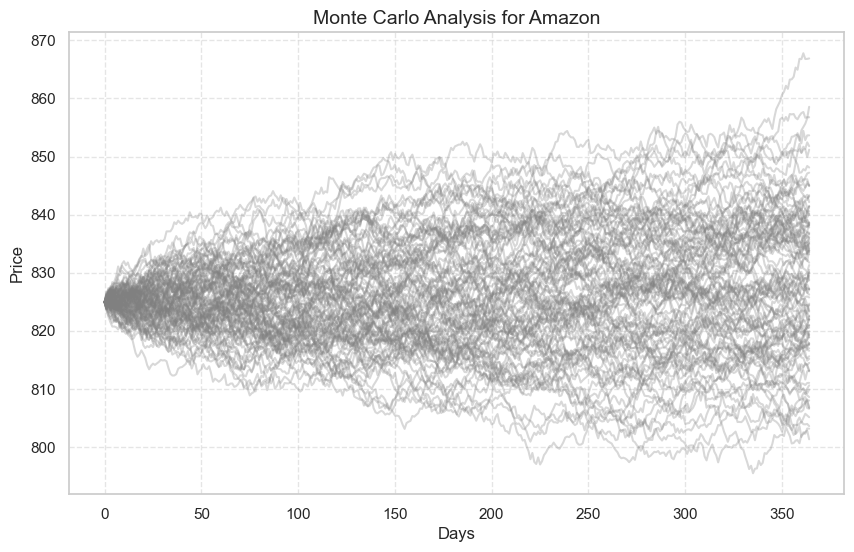

In [78]:
import matplotlib.pyplot as plt

# Define the starting price
start_price = 824.95

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Amazon', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [79]:
# For Apple Stock - AAPL
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-26  163.059998  165.279999  162.800003  163.759995  162.890533   
2023-04-27  165.190002  168.559998  165.190002  168.410004  167.515854   
2023-04-28  168.490005  169.850006  167.880005  169.679993  168.779114   
2023-05-01  169.279999  170.449997  168.639999  169.589996  168.689590   
2023-05-02  170.089996  170.350006  167.539993  168.539993  167.645142   

              Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                   
2023-04-26  45498800             NaN             NaN             NaN   
2023-04-27  64902300             NaN             NaN             NaN   
2023-04-28  55209200             NaN             NaN             NaN   
2023-05-01  52472900             NaN             NaN             NaN   
2023-05-02  48425700             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2023-04-26              NaN           NaN  
2023-04-27              NaN      0.028395  
2023-04-28              NaN      0.007541  
2023-05-01              NaN     -0.000530  
2023-05-02              NaN     -0.006191

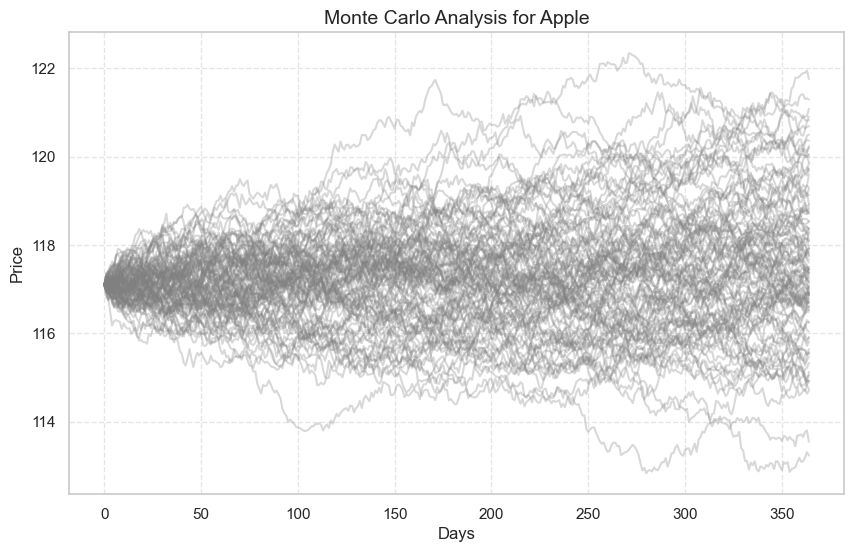

In [81]:
import matplotlib.pyplot as plt

# Define the starting price
start_price = 117.10

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Apple', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [82]:
# For Microsoft Stock - MSFT
MSFT.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-26  296.700012  299.570007  292.730011  295.369995  292.965515   
2023-04-27  295.970001  305.200012  295.250000  304.829987  302.348541   
2023-04-28  304.010010  308.929993  303.309998  307.260010  304.758759   
2023-05-01  306.970001  308.600006  305.149994  305.559998  303.072571   
2023-05-02  307.760010  309.179993  303.910004  305.410004  302.923798   

              Volume  
Date                  
2023-04-26  64599200  
2023-04-27  46462600  
2023-04-28  36446700  
2023-05-01  21294100  
2023-05-02  26404400

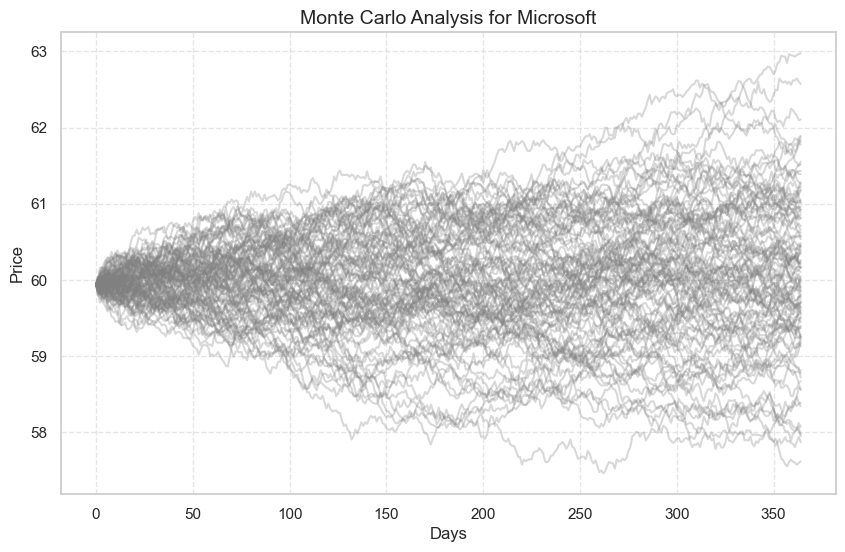

In [84]:
import matplotlib.pyplot as plt

# Define the starting price
start_price = 59.94

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Microsoft', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [85]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

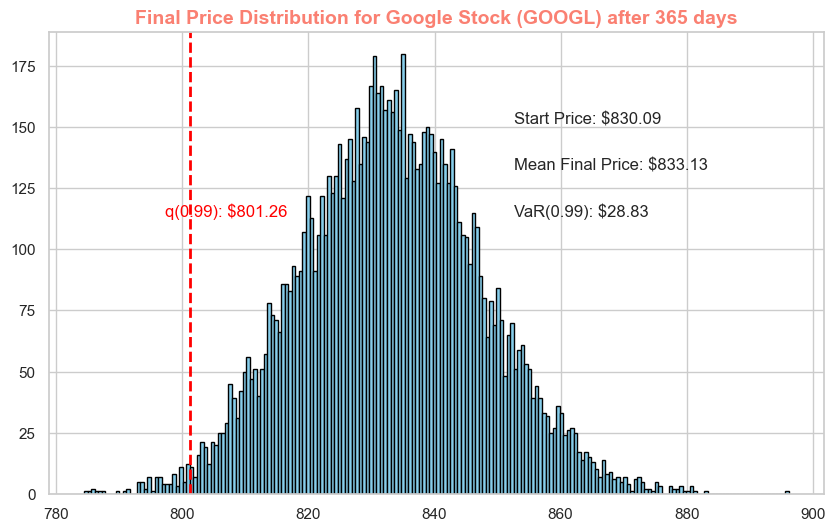

In [88]:
# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='skyblue', edgecolor='black')  # Customize histogram color and edgecolor

# Additional information on the plot using plt.text
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties

# Add title
plt.title(f'Final Price Distribution for Google Stock (GOOGL) after {days} days', fontsize=14, fontweight='bold', color='salmon')

# Show plot
plt.show()


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $17.98 for every investment of 
830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $17.98 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [89]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

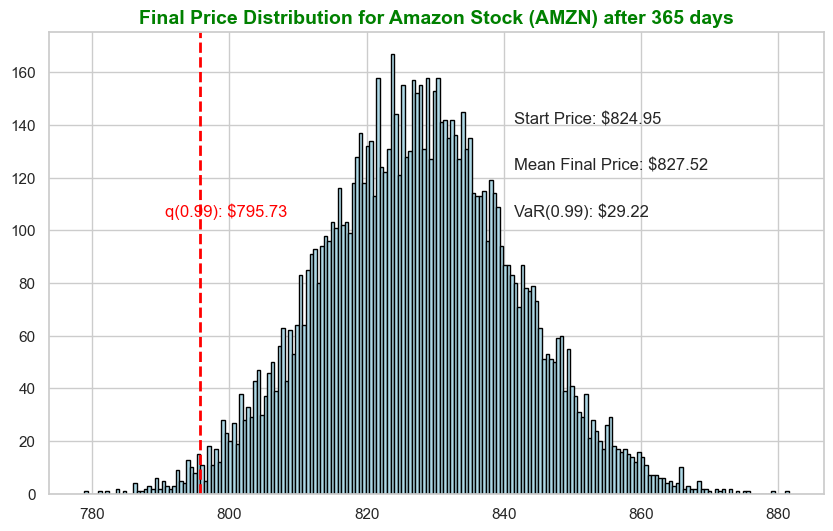

In [91]:
# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='lightblue', edgecolor='black')  # Customize histogram color and edgecolor

# Additional information on the plot using plt.text
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties

# Add title
plt.title(f'Final Price Distribution for Amazon Stock (AMZN) after {days} days', fontsize=14, fontweight='bold', color='green')

# Show plot
plt.show()


This basically means for every initial AMZN stock you purchase you're putting about $18.13 at risk 99% of the time from our Monte Carlo Simulation.

In [92]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

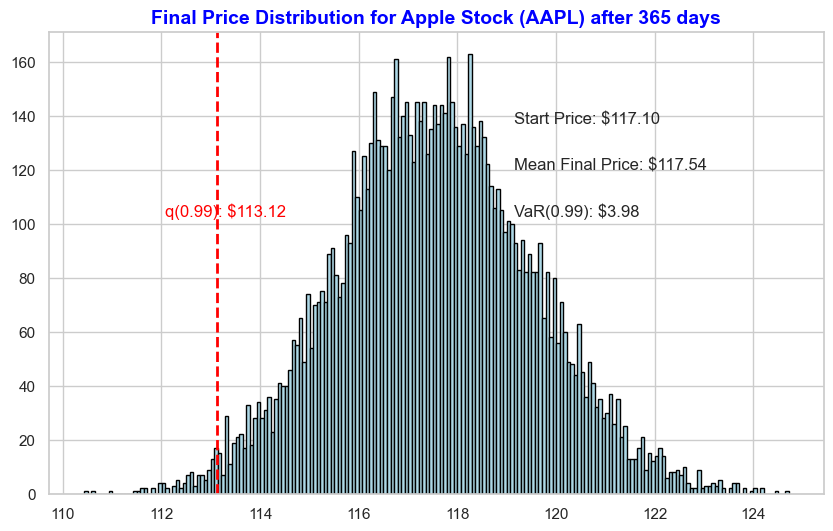

In [93]:
# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='lightblue', edgecolor='black')  # Customize histogram color and edgecolor

# Additional information on the plot using plt.text
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties

# Add title
plt.title(f'Final Price Distribution for Apple Stock (AAPL) after {days} days', fontsize=14, fontweight='bold', color='blue')

# Show plot
plt.show()


Great! This basically means for every initial AAPL stock you purchase you're putting about $2.48 at risk 99% of the time from our Monte Carlo Simulation.

In [94]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

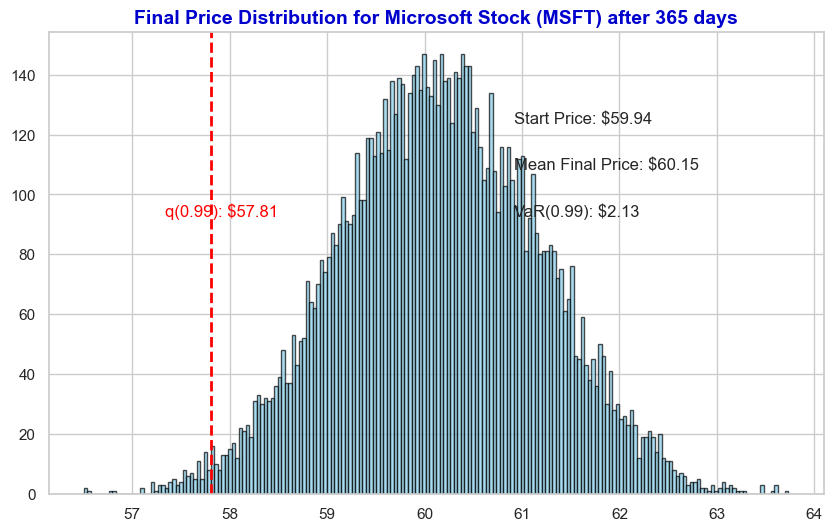

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices with customized histogram properties
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='skyblue', edgecolor='black', alpha=0.7)  # Customize histogram color, edgecolor, and transparency

# Additional information on the plot using plt.text for better layout and positioning
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a vertical line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties for the quantile

# Add a title with bold font style and adjusted color
plt.title(f'Final Price Distribution for Microsoft Stock (MSFT) after {days} days', fontsize=14, fontweight='bold', color='mediumblue')

# Show the plot
plt.show()


Nice, This basically means for every initial MSFT stock you purchase you're putting about $1.28 at risk 99% of the time from our Monte Carlo Simulation.